# **graphrag_tagger Demo**

*A lightweight toolkit for extracting topics from PDFs and visualizing their connections using graphs.*

## **1. Installation & Setup**
Ensure you have Python installed, then install the package locally:

```bash
pip install graphrag-tagger
```

In [5]:
#pip install graphrag-tagger

Install all the **Core Dependecies**
- **PyMuPDF** – Extracts text from PDF files.
- **scikit-learn & ktrain** – Performs topic modeling.
- **LLM Client** – Enhances and refines extracted topics.
- **networkx** – Constructs and analyzes graphs.

```bash
pip install pymupdf scikit-learn ktrain llm networkx pytest
```

In [6]:
#pip install pymupdf scikit-learn ktrain llm networkx pytest

Load all the dependencies

## **2. Basic Usage**

Load a sample PDF document

In [7]:
#import the tagger module from the graphrag_tagger package
from graphrag_tagger import tagger
import os

# A sample PDF document Graph Retrieval-Augmented Generation: A Survey availabe at https://arxiv.org/pdf/2408.08921v2
# Define sample parameters
params = {
    'pdf_folder': 'example',  # update path to your PDF folder
    'chunk_size': 256,
    'chunk_overlap': 25,
    'n_components': None,
    'n_features': 512,
    'min_df': 2,
    'max_df': 0.95,
    'llm_model': 'ollama:qwen2.5',
    'output_folder': 'results',  # update path to your output folder
    'model_choice': 'sk' # kt for ktrain or sk for scikit-learn
}


In [8]:
# # Create output folder if it doesn't exist

os.makedirs(params['output_folder'], exist_ok=True)

# # Run the tagging pipeline
tagger.main(params)

['From Local to Global: A GraphRAG Approach to\nQuery-Focused Summarization\nDarren Edge1†\nHa Trinh1†\nNewman Cheng2\nJoshua Bradley2\nAlex Chao3\nApurva Mody3\nSteven Truitt2\nDasha Metropolitansky1\nRobert Osazuwa Ness1\nJonathan Larson1\n1Microsoft Research\n2Microsoft Strategic Missions and Technologies\n3Microsoft Office of the CTO\n{daedge,trinhha,newmancheng,joshbradley,achao,moapurva,\nsteventruitt,dasham,robertness,jolarso}@microsoft.com\n†These authors contributed equally to this work\nAbstract\nThe use of retrieval-augmented generation (RAG) to retrieve relevant informa-\ntion from an external knowledge source enables large language models (LLMs)\nto answer questions over private and/or previously unseen document collections.\nHowever, RAG fails on global questions directed at an entire text corpus, such\nas “What are the main themes in the dataset?”, since this is inherently a query-\nfocused summarization (QFS) task, rather than an explicit retrieval task. Prior', 'focuse

Generating Tags: 100%|██████████| 81/81 [14:01<00:00, 10.39s/it]

Saved 81 chunk files to results


You can use any LLM available online for this demo we are using Ollama qwen2.5

for ```Ollama``` ```ConnectionError```  
Install and Setup Ollama from [Ollama Repo](https://github.com/ollama/ollama) and download the model **qwen2.5** for this demo code using 
```bash
ollama pull qwen2.5
```

## **3. Topic Extraction & Refinement**

In [9]:
from glob import glob

# Get paths of all the chunk JSON files
files = glob(os.path.join(params["output_folder"], "chunk_*.json"))
len(files)

81

In [10]:
import json

# Join all the chunk JSON files into a single list of dictionaries
raws: list[dict] = [json.load(open(file,encoding='utf-8')) for file in files]

for i, raw in enumerate(raws):
    if "chunk" not in raw:
        print(i, raw)
raw

{'chunk': '2.2\nUsing Knowledge Graphs with LLMs and RAG\nApproaches to knowledge graph extraction from natural language text corpora include rulematching, statistical pattern recognition, clustering, and embeddings (Etzioni et al., 2004; Kim et al., 2016; Mooney and Bunescu, 2005; Yates et al., 2007). GraphRAG falls into a more recent body of research that use of LLMs for knowledge graph extraction (Ban et al., 2023; Melnyk et al., 2022;\nOpenAI, 2023; Tan et al., 2017; Trajanoska et al., 2023; Yao et al., 2023; Yates et al., 2007; Zhang et al., 2024a). It also adds to a growing body of RAG approaches that use a knowledge graph as an index (Gao et al., 2023). Some techniques use subgraphs, elements of the graph, or properties of the graph structure directly in the prompt (Baek et al., 2023; He et al., 2024; Zhang, 2023)',
 'source_file': 'example\\GraphRagPaper.pdf',
 'classification': {'content_type': 'paragraph',
  'is_sufficient': True,
  'topics': ['Topic 1', 'Topic 5']}}

In [11]:
import json



raws: list[dict] = [json.load(open(file,encoding='utf-8')) for file in files]
raws = [{
    "chunk": raw["chunk"],
    "source_file": raw["source_file"],
    "chunk_file": file,
    **raw["classification"],
} for file, raw in zip(files, raws)]

print(raws[0].keys(),"\n")
print(raws[0]["chunk"])

dict_keys(['chunk', 'source_file', 'chunk_file', 'content_type', 'is_sufficient', 'topics']) 

focused summarization (QFS) task, rather than an explicit retrieval task. Prior
QFS methods, meanwhile, do not scale to the quantities of text indexed by typical RAG systems. To combine the strengths of these contrasting methods, we propose GraphRAG, a graph-based approach to question answering over private text corpora that scales with both the generality of user questions and the quantity of source text. Our approach uses an LLM to build a graph index in two stages: first, to derive an entity knowledge graph from the source documents, then to pregenerate community summaries for all groups of closely related entities. Given a question, each community summary is used to generate a partial response, before all partial responses are again summarized in a final response to the user. For a class of global sensemaking questions over datasets in the 1 million token range, we show that GraphRAG lead

In [12]:
import pandas as pd

# Create a DataFrame from the chunks which includes dict_keys(['chunk', 'source_file', 'chunk_file', 'content_type', 'is_sufficient', 'topics']) 

chunk_classification = pd.DataFrame(raws)

chunk_classification

,chunk,source_file,chunk_file,content_type,is_sufficient,topics
0,"focused summarization (QFS) task, rather than ...",example\GraphRagPaper.pdf,results\chunk_1.json,paragraph,True,"[Topic 1, Topic 5, Topic 7]"
1,or as factual grounding for generated outputs ...,example\GraphRagPaper.pdf,results\chunk_10.json,paragraph,True,"[Topic 1, Topic 5, Topic 4]"
2,Many benchmark datasets for open-domain questi...,example\GraphRagPaper.pdf,results\chunk_11.json,paragraph,True,"[Topic 1, Topic 5]"
3,"to ensure relevance, diversity, and alignment ...",example\GraphRagPaper.pdf,results\chunk_12.json,paragraph,True,"[Topic 1, Topic 5]"
4,3.1.1\nSource Documents →Text Chunks\nTo start...,example\GraphRagPaper.pdf,results\chunk_13.json,paragraph,True,"[Topic 1, Topic 7]"
...,...,...,...,...,...,...
76,{answer2}\nAssess which answer is better accor...,example\GraphRagPaper.pdf,results\chunk_79.json,paragraph,True,"[Topic 4, Topic 6]"
77,GraphRAG builds upon prior work on advanced RA...,example\GraphRagPaper.pdf,results\chunk_8.json,paragraph,True,"[Topic 5, Topic 1]"
78,viewpoints and angles on the question.\nFor ex...,example\GraphRagPaper.pdf,results\chunk_80.json,paragraph,True,"[Topic 4, Topic 6]"
79,the topic without being misled or making falla...,example\GraphRagPaper.pdf,results\chunk_81.json,paragraph,True,"[Topic 2, Topic 4]"


In [13]:
# Getting the list of extracted topics
extracted_topics = json.load(open("results/topics.json",encoding='utf-8'))["topics"]

# Mapping the topic ids provided by the LLM to the corresponding topic names saved in the topics.json file
def map_topics(topic_ids):
    return [extracted_topics[int(topic.split()[1])-1] for topic in topic_ids if topic not in extracted_topics and "Topic " in topic]

chunk_classification['extracted_topics'] = chunk_classification['topics'].map(map_topics)
chunk_classification

,chunk,source_file,chunk_file,content_type,is_sufficient,topics,extracted_topics
0,"focused summarization (QFS) task, rather than ...",example\GraphRagPaper.pdf,results\chunk_1.json,paragraph,True,"[Topic 1, Topic 5, Topic 7]","[Language Models, RAG Summaries, Entity Relati..."
1,or as factual grounding for generated outputs ...,example\GraphRagPaper.pdf,results\chunk_10.json,paragraph,True,"[Topic 1, Topic 5, Topic 4]","[Language Models, RAG Summaries, Evaluation Gr..."
2,Many benchmark datasets for open-domain questi...,example\GraphRagPaper.pdf,results\chunk_11.json,paragraph,True,"[Topic 1, Topic 5]","[Language Models, RAG Summaries]"
3,"to ensure relevance, diversity, and alignment ...",example\GraphRagPaper.pdf,results\chunk_12.json,paragraph,True,"[Topic 1, Topic 5]","[Language Models, RAG Summaries]"
4,3.1.1\nSource Documents →Text Chunks\nTo start...,example\GraphRagPaper.pdf,results\chunk_13.json,paragraph,True,"[Topic 1, Topic 7]","[Language Models, Entity Relationships]"
...,...,...,...,...,...,...,...
76,{answer2}\nAssess which answer is better accor...,example\GraphRagPaper.pdf,results\chunk_79.json,paragraph,True,"[Topic 4, Topic 6]","[Evaluation Graph, Community Questions]"
77,GraphRAG builds upon prior work on advanced RA...,example\GraphRagPaper.pdf,results\chunk_8.json,paragraph,True,"[Topic 5, Topic 1]","[RAG Summaries, Language Models]"
78,viewpoints and angles on the question.\nFor ex...,example\GraphRagPaper.pdf,results\chunk_80.json,paragraph,True,"[Topic 4, Topic 6]","[Evaluation Graph, Community Questions]"
79,the topic without being misled or making falla...,example\GraphRagPaper.pdf,results\chunk_81.json,paragraph,True,"[Topic 2, Topic 4]","[Data Response, Evaluation Graph]"


In [14]:
# Though the main method of the tagger module uses LLM prompt to extract clean topics from the Chunk files you can explicitely use the LLM.clean_topics
from graphrag_tagger.chat.llm import LLM, LLMService

# Initialize the LLM you want to use
llm_service = LLMService(model="ollama:qwen2.5")
llm = LLM(llm_service=llm_service) 

# Get the cleaned topics for each of the extracted topics 
clean_topics = chunk_classification['extracted_topics'].map(llm.clean_topics)
print(clean_topics)
chunk_classification


0     [Language Models, RAG Summaries, Entity Relati...
1     [Language Models, RAG Summaries, Evaluation Me...
2                      [Language Models, RAG Summaries]
3                      [Language Models, RAG Summaries]
4          [Natural Language Processing, Relationships]
                            ...                        
76      [Evaluation Visualization, Community Inquiries]
77                     [RAG Summaries, Language Models]
78                [Graph Evaluation, Community Queries]
79                 [Data Analysis, Graph Visualization]
80                     [Language Models, RAG Summaries]
Name: extracted_topics, Length: 81, dtype: object


,chunk,source_file,chunk_file,content_type,is_sufficient,topics,extracted_topics
0,"focused summarization (QFS) task, rather than ...",example\GraphRagPaper.pdf,results\chunk_1.json,paragraph,True,"[Topic 1, Topic 5, Topic 7]","[Language Models, RAG Summaries, Entity Relati..."
1,or as factual grounding for generated outputs ...,example\GraphRagPaper.pdf,results\chunk_10.json,paragraph,True,"[Topic 1, Topic 5, Topic 4]","[Language Models, RAG Summaries, Evaluation Gr..."
2,Many benchmark datasets for open-domain questi...,example\GraphRagPaper.pdf,results\chunk_11.json,paragraph,True,"[Topic 1, Topic 5]","[Language Models, RAG Summaries]"
3,"to ensure relevance, diversity, and alignment ...",example\GraphRagPaper.pdf,results\chunk_12.json,paragraph,True,"[Topic 1, Topic 5]","[Language Models, RAG Summaries]"
4,3.1.1\nSource Documents →Text Chunks\nTo start...,example\GraphRagPaper.pdf,results\chunk_13.json,paragraph,True,"[Topic 1, Topic 7]","[Language Models, Entity Relationships]"
...,...,...,...,...,...,...,...
76,{answer2}\nAssess which answer is better accor...,example\GraphRagPaper.pdf,results\chunk_79.json,paragraph,True,"[Topic 4, Topic 6]","[Evaluation Graph, Community Questions]"
77,GraphRAG builds upon prior work on advanced RA...,example\GraphRagPaper.pdf,results\chunk_8.json,paragraph,True,"[Topic 5, Topic 1]","[RAG Summaries, Language Models]"
78,viewpoints and angles on the question.\nFor ex...,example\GraphRagPaper.pdf,results\chunk_80.json,paragraph,True,"[Topic 4, Topic 6]","[Evaluation Graph, Community Questions]"
79,the topic without being misled or making falla...,example\GraphRagPaper.pdf,results\chunk_81.json,paragraph,True,"[Topic 2, Topic 4]","[Data Response, Evaluation Graph]"


## **4. Graph Construction & Visualization**


In [15]:
import os
import pytest
from graphrag_tagger.build_graph import process_graph



# Define sample input and output folders
input_folder = (
    "results"  # update this path to your folder containing JSON files
)
output_folder = (
    "graph_outputs"    # update this path where you want your result to be stored
)

# # Create output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Process graph with a specified threshold percentile (e.g., 97.5)
graph = process_graph(
    input_folder,
    output_folder,
    threshold_percentile=97.5,
    content_type_filter="paragraph", # Use only paragraph for chunk graph builder
)


# # The processed graph is stored in 'graph' and the connected components map is saved to the output folder.
print("Graph processing completed.")


Processing graph...
Found 81 files in results.
Filtering by content type: paragraph


Loading raw files: 100%|██████████| 81/81 [00:00<00:00, 4866.62it/s]


Loaded 56 raw documents.
Computing scores...
Scores computed.
Building graph...


Building nodes & edges: 100%|██████████| 56/56 [00:00<00:00, 19014.09it/s]

Graph built. Nodes: 56 Edges: 1000
Starting graph pruning...
Min weight: 1.8426656189501966
Max weight: 8.84165884825782
Mean weight: 3.7248463103572713
Median weight: 3.44060509682562
Pruning threshold (97.5th percentile): 6.832326562640957
Removing 973 edges out of 1000...
Graph pruned. Nodes: 56 Edges: 27
Computing connected components...
Number of connected components: 42
Component sizes (min, max, mean): 1 5 1.3333333333333333
Connected components map saved to graph_outputs\connected_components.json
Graph processing complete.
Graph processing completed.


In [16]:
import json
import os

# Extract the connected_components List from the JSON file stored after graoh processing
graph_edges: dict = json.load(open(os.path.join(output_folder, "connected_components.json")))
graph_edges

{'0': 0,
 '27': 0,
 '1': 1,
 '14': 1,
 '17': 1,
 '19': 1,
 '23': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9,
 '10': 10,
 '11': 11,
 '12': 12,
 '13': 13,
 '15': 14,
 '16': 15,
 '32': 16,
 '46': 16,
 '18': 16,
 '22': 16,
 '50': 17,
 '51': 17,
 '20': 17,
 '53': 17,
 '21': 18,
 '54': 18,
 '24': 19,
 '25': 20,
 '26': 21,
 '28': 22,
 '29': 23,
 '30': 24,
 '31': 25,
 '33': 26,
 '34': 27,
 '35': 28,
 '36': 29,
 '37': 30,
 '38': 31,
 '39': 32,
 '40': 33,
 '41': 34,
 '42': 35,
 '43': 36,
 '44': 36,
 '45': 36,
 '47': 37,
 '48': 38,
 '49': 39,
 '52': 40,
 '55': 41}

In [17]:
# Find The chunks and all the chunks they are connected to
connected_chunks = {}
for k,v in graph_edges.items():
    if v in connected_chunks:
        connected_chunks[v].append(int(k))
    else:
        connected_chunks[v] = [int(k)]
connected_chunks

{0: [0, 27],
 1: [1, 14, 17, 19, 23],
 2: [2],
 3: [3],
 4: [4],
 5: [5],
 6: [6],
 7: [7],
 8: [8],
 9: [9],
 10: [10],
 11: [11],
 12: [12],
 13: [13],
 14: [15],
 15: [16],
 16: [32, 46, 18, 22],
 17: [50, 51, 20, 53],
 18: [21, 54],
 19: [24],
 20: [25],
 21: [26],
 22: [28],
 23: [29],
 24: [30],
 25: [31],
 26: [33],
 27: [34],
 28: [35],
 29: [36],
 30: [37],
 31: [38],
 32: [39],
 33: [40],
 34: [41],
 35: [42],
 36: [43, 44, 45],
 37: [47],
 38: [48],
 39: [49],
 40: [52],
 41: [55]}

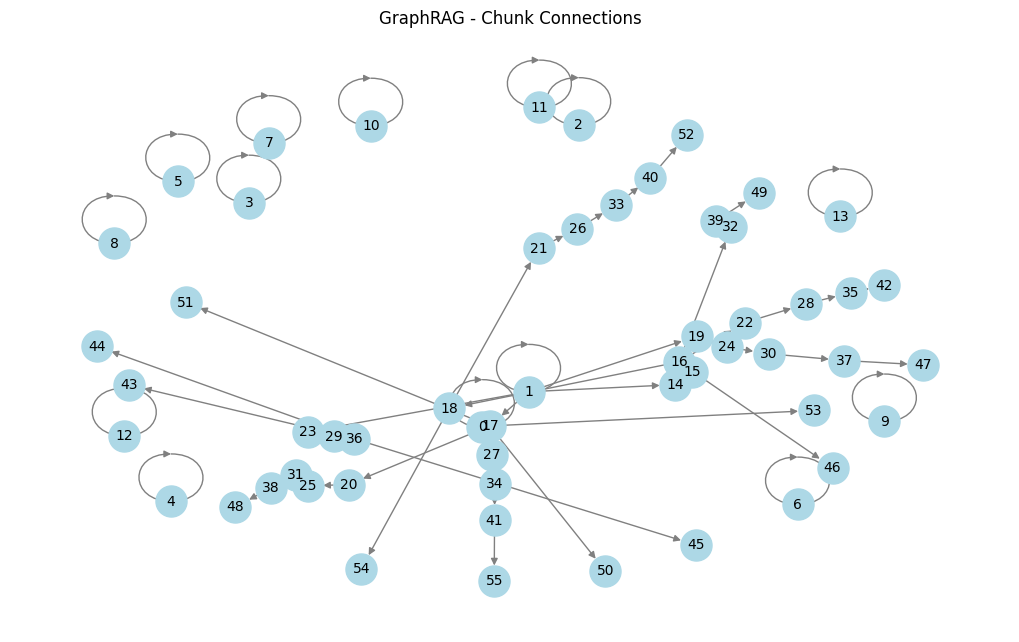

In [18]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a Graph object
G = nx.DiGraph()

# Add edges based on the adjacency list
for parent, children in connected_chunks.items():
    for child in children:
        G.add_edge(parent, child)  # Connect parent to each child

# Draw the graph
plt.figure(figsize=(10, 6))
nx.draw(G, with_labels=True, node_color="lightblue", edge_color="gray", node_size=500, font_size=10)

plt.title("GraphRAG - Chunk Connections")
plt.show()


In [19]:
from pyvis.network import Network

# Initialize Pyvis Network
net = Network(notebook=True, height="600px", width="100%", bgcolor="#222222", font_color="white",directed=True)

# Add nodes & edges
for parent, children in connected_chunks.items():
    net.add_node(parent, label=f"Chunk {parent}", color="red",title=chunk_classification["extracted_topics"].iloc[parent])  # Parent nodes
    for child in children:
        if parent != child:  # Avoid self-edges
            net.add_node(child, label=f"Chunk {child}", color="lightblue",title=chunk_classification["extracted_topics"].iloc[parent])  # Child nodes
            net.add_edge(parent, child)  # Connect edges
# Save and Display
net.force_atlas_2based()
net.write_html("graph.html")
os.startfile("graph.html")
